In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size to (28,14)
plt.rcParams['figure.figsize'] = (28, 14)


In [2]:
def create_id(df, letters):
    df['customer_id'] = letters + '_' + df['customer_no'].astype(str)

In [3]:
#5 Calculate the total number of customers present in the supermarket over time.

def question_05(df):
    df = pd.DataFrame(df.groupby('timestamp').count()['customer_no'])
    sns.lineplot(data=df)

In [112]:
def question_06(df):
    df.reset_index(inplace=True)
    df_first = pd.DataFrame(columns=df.columns)
    df_second = pd.DataFrame(columns=df.columns)
    for i in range(1,df['customer_no'].max(),1):
        #print(i)
        a = df[df['customer_no'] == i].iloc[0]
        #print(a)
        df_first = df_first.append(a)
        print(df_first.head())
        b = df[df['customer_no'] == i].iloc[1:]
        df_second = df_second.append(b)
    fig, axs = plt.subplots(2)
    sns.histplot(df_first, x="location", ax=axs[0])
    sns.histplot(df_second, x='location', ax=axs[1])


            timestamp customer_no location
0 2019-09-02 07:03:00           1    dairy
            timestamp customer_no location
0 2019-09-02 07:03:00           1    dairy
2 2019-09-02 07:03:00           2    dairy
            timestamp customer_no location
0 2019-09-02 07:03:00           1    dairy
2 2019-09-02 07:03:00           2    dairy
4 2019-09-02 07:04:00           3    dairy
            timestamp customer_no location
0 2019-09-02 07:03:00           1    dairy
2 2019-09-02 07:03:00           2    dairy
4 2019-09-02 07:04:00           3    dairy
6 2019-09-02 07:04:00           4    dairy
            timestamp customer_no  location
0 2019-09-02 07:03:00           1     dairy
2 2019-09-02 07:03:00           2     dairy
4 2019-09-02 07:04:00           3     dairy
6 2019-09-02 07:04:00           4     dairy
8 2019-09-02 07:05:00           5  checkout
            timestamp customer_no  location
0 2019-09-02 07:03:00           1     dairy
2 2019-09-02 07:03:00           2     dairy
4 

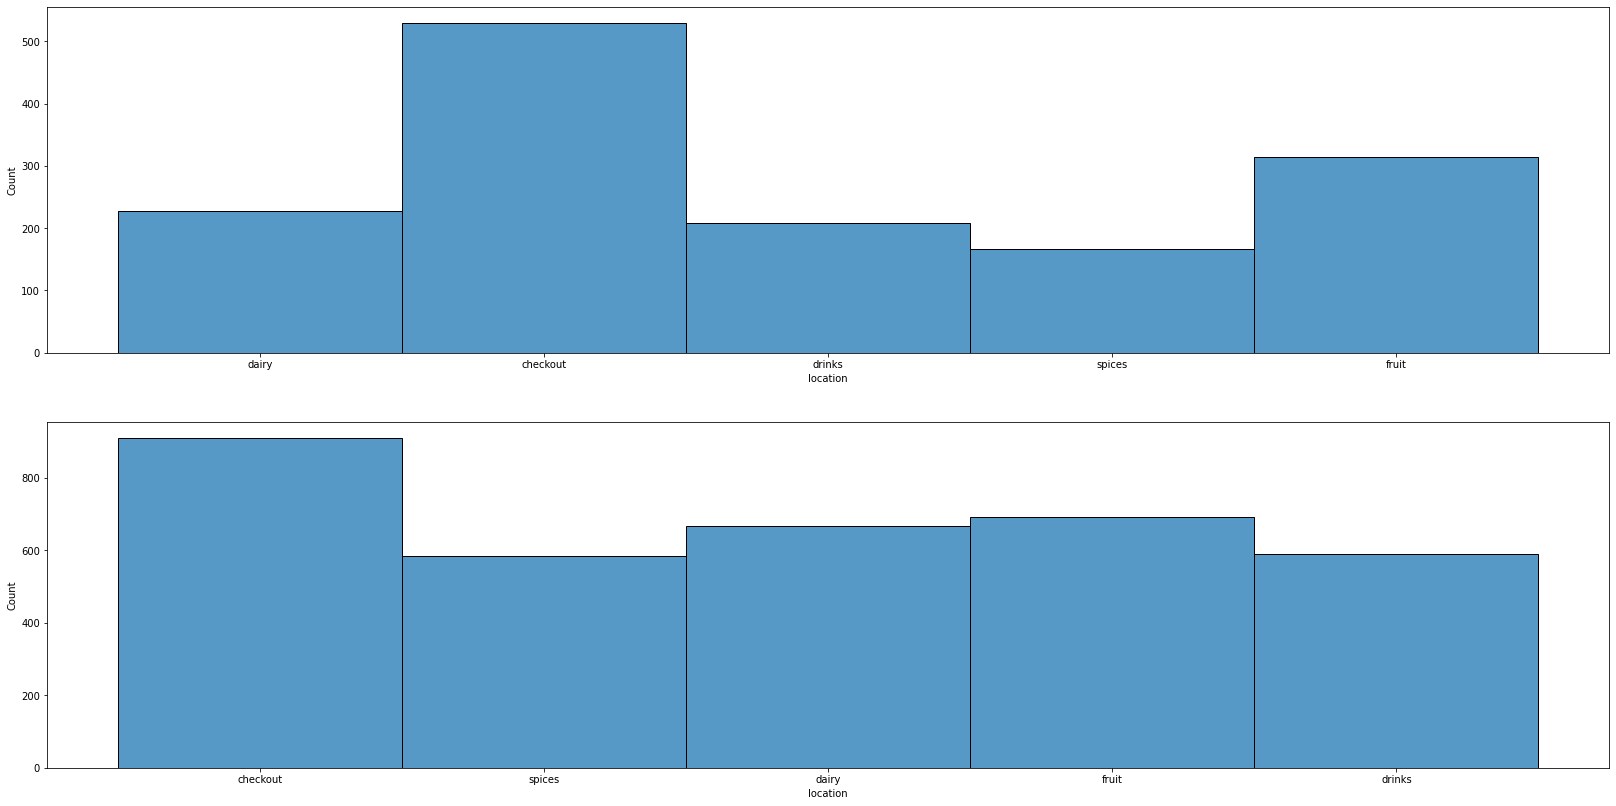

In [115]:
question_06(df_0)

In [28]:
def markov_columns(df):
    df["before"] = df['location']
    df['after'] = df['location'].shift(-1)
    df = df.drop(df[(df['before'] == 'checkout')].index)
    #df["before"] = df.drop(df[df['location'] == 'checkout'], inplace=True).index
    df.set_index('customer_id', inplace=True)
    df.drop(columns=['customer_no','location'], inplace=True)
    return df


In [113]:
df_0 = pd.read_csv('data/monday.csv', parse_dates=True, index_col=0, sep=';')
df_0.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices


In [6]:
df_1 = pd.read_csv('data/tuesday.csv', parse_dates=True, index_col=0, sep=';')
df_2 = pd.read_csv('data/wednesday.csv', parse_dates=True, index_col=0, sep=';')
df_3 = pd.read_csv('data/thursday.csv', parse_dates=True, index_col=0, sep=';')
df_4 = pd.read_csv('data/friday.csv', parse_dates=True, index_col=0, sep=';')

In [114]:
df_0.sort_values('customer_no', inplace=True)
df_1.sort_values('customer_no', inplace=True)
df_2.sort_values('customer_no', inplace=True)
df_3.sort_values('customer_no', inplace=True)
df_4.sort_values('customer_no', inplace=True)


In [8]:
create_id(df_0,'MO')
create_id(df_1,'TU')
create_id(df_2,'WE')
create_id(df_3,'TH')
create_id(df_4,'FR')


In [ ]:
df_3.iloc[3,:]
#df_3.head()


In [9]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4884 entries, 2019-09-02 07:03:00 to 2019-09-02 21:50:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  4884 non-null   int64 
 1   location     4884 non-null   object
 2   customer_id  4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 152.6+ KB


In [29]:
#we create a list with every single df in order to concatenate them together
df_lst =[df_0,df_1,df_2,df_3,df_4]
df = pd.concat(df_lst)
df.head()

,customer_no,location,customer_id
timestamp,,,
2019-09-02 07:03:00,1,dairy,MO_1
2019-09-02 07:05:00,1,checkout,MO_1
2019-09-02 07:03:00,2,dairy,MO_2
2019-09-02 07:06:00,2,checkout,MO_2
2019-09-02 07:04:00,3,dairy,MO_3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  24877 non-null  int64 
 1   location     24877 non-null  object
 2   customer_id  24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.4+ KB


In [12]:
df.tail()

,customer_no,location,customer_id
timestamp,,,
2019-09-06 21:48:00,1507,dairy,FR_1507
2019-09-06 21:48:00,1508,dairy,FR_1508
2019-09-06 21:50:00,1508,checkout,FR_1508
2019-09-06 21:50:00,1509,drinks,FR_1509
2019-09-06 21:50:00,1510,spices,FR_1510


In [13]:
df['customer_id'].value_counts()

MO_526     18
TH_1047    17
FR_102     17
FR_1246    16
FR_1238    16
           ..
MO_1447     1
FR_1510     1
FR_1506     1
TH_1533     1
FR_1509     1
Name: customer_id, Length: 7445, dtype: int64

In [30]:
df_mar = markov_columns(df)
df_mar.head()

/Users/stefan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,before,after
customer_id,,
MO_1,dairy,checkout
MO_2,dairy,checkout
MO_3,dairy,checkout
MO_4,dairy,checkout
MO_5,spices,drinks


In [87]:
df_mar.head()
df_mar.to_csv('df_mar.csv')

In [37]:
P = pd.crosstab(df_mar['after'], df_mar['before'], normalize=0)
P

before,dairy,drinks,fruit,spices
after,,,,
checkout,0.269421,0.210744,0.347107,0.172727
dairy,0.177258,0.185619,0.357860,0.279264
drinks,0.270270,0.173745,0.291506,0.264479
fruit,0.334459,0.238176,0.177365,0.250000
spices,0.323529,0.296218,0.266807,0.113445


In [ ]:
question_05(df_0)


In [ ]:
question_05(df_1)


In [ ]:
question_05(df_2)


In [ ]:
question_05(df_3)


In [ ]:
question_05(df_4)